In [1]:
#import libraries

import os
import re
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# upgrade scikit image by opening anaconda prompt and type conda install -c conda-forge scikit-image

In [3]:
import skimage
import skimage.color
import skimage.io
import skimage.transform
import skimage.feature


In [4]:
skimage.__version__


'0.16.2'

In [5]:
#load the data

data = pickle.load(open('data_animals_head_20.pickle','rb'))

In [6]:
data['description']

'there are 20 classes and 2057 images are there. all the images are 80 X 80(rgb)'

In [7]:
#split the data into independent and dependent
X= data['data']#independent
y = data['target']#dependent


In [8]:
print(X)

[[[[196 214 188]
   [196 214 188]
   [196 214 188]
   ...
   [ 81  76  80]
   [ 81  76  80]
   [ 69  64  68]]

  [[196 214 188]
   [196 214 188]
   [196 215 187]
   ...
   [ 82  77  81]
   [ 83  78  82]
   [ 77  72  76]]

  [[193 213 185]
   [194 214 186]
   [194 214 186]
   ...
   [ 82  77  81]
   [ 81  76  80]
   [ 78  73  77]]

  ...

  [[254 254 254]
   [254 254 254]
   [254 254 254]
   ...
   [ 70  65  69]
   [ 65  60  64]
   [ 62  57  63]]

  [[254 254 254]
   [254 254 254]
   [254 254 254]
   ...
   [ 66  61  65]
   [ 62  57  61]
   [ 64  59  65]]

  [[254 254 254]
   [254 254 254]
   [254 254 254]
   ...
   [ 56  51  55]
   [ 79  74  78]
   [ 70  63  70]]]


 [[[  4   2   3]
   [  7   5   6]
   [  6   5   3]
   ...
   [ 42  31  25]
   [ 46  35  29]
   [ 45  32  26]]

  [[  7   5   6]
   [  5   4   2]
   [  2   1   0]
   ...
   [ 22  11   5]
   [ 43  32  26]
   [ 47  36  30]]

  [[  6   5   3]
   [  3   2   0]
   [  2   1   0]
   ...
   [ 33  24  17]
   [ 48  39  32]
   [ 54  45

In [9]:
print(y)

['bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'c

In [10]:
#split the data into train and test split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, stratify=y)

In [11]:
x_train.shape,x_test.shape,len(y_train),len(y_test)

((1645, 80, 80, 3), (412, 80, 80, 3), 1645, 412)

# Feature extraction
hog
# preprocessing 
  grayscale
  hog transformer

In [12]:

from sklearn.base import BaseEstimator, TransformerMixin

In [13]:
class rgb2gray_transform(BaseEstimator, TransformerMixin):
    import skimage.color
    
    def __init__(self):
        pass
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        return np.array([skimage.color.rgb2gray(x) for x in X])
        

In [14]:
x_train.shape

(1645, 80, 80, 3)

In [15]:
rgb2grayobj = rgb2gray_transform()
x_train_gray = rgb2grayobj.fit_transform(x_train)

In [16]:
x_train_gray.shape

(1645, 80, 80)

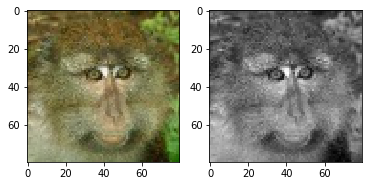

In [17]:
#visualize it
plt.subplot(1,2,1)
plt.imshow(x_train[10])
plt.subplot(1,2,2)
plt.imshow(x_train_gray[10], cmap='gray')

In [18]:
#previous is converting rgb to grayscale
# below is to convert into hog tranform



In [19]:
class hogtransformer(BaseEstimator, TransformerMixin):
    import skimage.feature
    def __init__(self,orientations=9,pixels_per_cell=(8,8),cells_per_block=(3,3)):
        self.orientations =  orientations
        self.pixel_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        def local_hog(img):
            hog_features = skimage.feature.hog(img, orientations= self.orientations,
                                pixels_per_cell = self.pixel_per_cell,
                                cells_per_block = self.cells_per_block)
            return hog_features
        
        hfeatures = np.array([local_hog(x) for x in X])
        return hfeatures
            

In [20]:
hogt = hogtransformer()

In [21]:
x_train_hog = hogt.fit_transform(x_train_gray)

# Training the machine learning model

In [22]:
#i'm using SGD classifier u can use svm also (note: decision tree kinda classifier like random forest and xgboost 
#will not work becoz this is not a text data which have rules and this image data)
#u can go for logicstic reg ,knearest neighbour

In [23]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import sklearn.metrics

In [24]:
model_sgd = SGDClassifier(loss='hinge',learning_rate= 'adaptive',
                          early_stopping=True,eta0=0.1)

In [25]:
#pipeline
x_train.shape,x_test.shape

((1645, 80, 80, 3), (412, 80, 80, 3))

In [26]:
# step 1 : convert into grayscale

#step2 : extract the features

#step 3 : normalization

#step 4 : machine learning

In [27]:
grayify= rgb2gray_transform()
hogify = hogtransformer()
scalify = StandardScaler()

In [28]:
# step 1 : convert into grayscale
x_train_gray = grayify.fit_transform(x_train)

#step2 : extract the features
x_train_hog = hogify.fit_transform(x_train_gray)

#step 3 : normalization
x_train_scale = scalify.fit_transform(x_train_hog)

#step 4 : machine learning
model_sgd.fit(x_train_scale,y_train)
#it will take some time pls wait

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=True, epsilon=0.1, eta0=0.1, fit_intercept=True,
              l1_ratio=0.15, learning_rate='adaptive', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [29]:
x_test_gray = grayify.fit_transform(x_test)

#step2 : extract the features
x_test_hog = hogify.fit_transform(x_test_gray )

#step 3 : normalization
x_test_scale = scalify.fit_transform(x_test_hog)

#step 4 : machine learning
y_pred_test = model_sgd.predict(x_test_scale)

In [30]:
y_pred_test

array(['bear', 'cat', 'rabbit', 'cat', 'wolf', 'eagle', 'rabbit', 'mouse',
       'rabbit', 'cat', 'pigeon', 'monkey', 'mouse', 'cow', 'duck', 'cow',
       'duck', 'lion', 'cat', 'tiger', 'lion', 'natural', 'cow', 'panda',
       'rabbit', 'monkey', 'eagle', 'dog', 'cat', 'monkey', 'mouse',
       'tiger', 'duck', 'cat', 'eagle', 'rabbit', 'panda', 'tiger',
       'rabbit', 'pigeon', 'bear', 'tiger', 'cow', 'bear', 'bear',
       'elephant', 'eagle', 'mouse', 'panda', 'cat', 'dog', 'eagle',
       'cat', 'panda', 'bear', 'rabbit', 'bear', 'bear', 'cow', 'chicken',
       'panda', 'sheep', 'rabbit', 'dog', 'wolf', 'human', 'human',
       'human', 'duck', 'duck', 'panda', 'rabbit', 'cat', 'wolf', 'panda',
       'rabbit', 'cow', 'eagle', 'cow', 'cow', 'mouse', 'cat', 'sheep',
       'panda', 'duck', 'lion', 'monkey', 'monkey', 'human', 'sheep',
       'elephant', 'human', 'natural', 'lion', 'bear', 'monkey', 'cat',
       'cat', 'mouse', 'duck', 'duck', 'rabbit', 'bear', 'sheep', 'eagl

In [31]:
#this is how u have to train and evaluate the model

In [32]:
#test model accuracy, precision, recall score

# Model evaluation


In [33]:
cr= sklearn.metrics.classification_report(y_test,y_pred_test,output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
bear,0.400000,0.400000,0.400000,20.000000
cat,0.512195,0.656250,0.575342,32.000000
chicken,0.500000,0.450000,0.473684,20.000000
cow,0.588235,0.476190,0.526316,21.000000
deer,0.529412,0.428571,0.473684,21.000000
dog,0.473684,0.346154,0.400000,26.000000
duck,0.607143,0.809524,0.693878,21.000000
eagle,0.450000,0.450000,0.450000,20.000000
elephant,0.687500,0.550000,0.611111,20.000000
human,0.800000,1.000000,0.888889,20.000000


In [34]:
#here this is a multiclassification model(we have 20 classes), approx above 50% is a good score
#doing roc becoz on multiclassfication is not recommended
#by doing kappa score it will tell u whether it is a good or bad 
#if it is more than 0.5 or 50% it is a good
#if more than 80 or 0.8 it is a excellent model
#we can still improve by improving tuning hyperparameters in model_sgd

In [35]:
metrics.cohen_kappa_score(y_test,y_pred_test)

0.5101771508957138

# pipeline model

In [36]:
from sklearn.pipeline import Pipeline

In [37]:
model_pipe = Pipeline([
    ('grayscale',rgb2gray_transform()),
    ('hogtransform',hogtransformer(orientations=8,pixels_per_cell=(10,10),cells_per_block=(3,3))),
    ('scaler', StandardScaler()),
    ('sgd', SGDClassifier(loss='hinge',learning_rate= 'adaptive',
                          early_stopping=True,eta0=0.1))
    
    
])

In [38]:
model_pipe.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


Pipeline(memory=None,
         steps=[('grayscale', rgb2gray_transform()),
                ('hogtransform',
                 hogtransformer(cells_per_block=(3, 3), orientations=8,
                                pixels_per_cell=None)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgd',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=True, epsilon=0.1, eta0=0.1,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='adaptive', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

In [39]:
y_pred_test = model_pipe.predict(x_test)

In [40]:
cr= sklearn.metrics.classification_report(y_test,y_pred_test,output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
bear,0.611111,0.550000,0.578947,20.000000
cat,0.703704,0.593750,0.644068,32.000000
chicken,0.538462,0.700000,0.608696,20.000000
cow,0.500000,0.523810,0.511628,21.000000
deer,0.571429,0.571429,0.571429,21.000000
dog,0.652174,0.576923,0.612245,26.000000
duck,0.708333,0.809524,0.755556,21.000000
eagle,0.562500,0.450000,0.500000,20.000000
elephant,0.812500,0.650000,0.722222,20.000000
human,0.720000,0.900000,0.800000,20.000000


In [41]:
# we see here the accuracy has been by improved by changong the pixels per cell
#next we'll see how to find the best hyperparameter
 #grid search for hyper parameter tuning
    

#  Grid search for hyper parameter tuning

In [42]:
from sklearn.model_selection import GridSearchCV


In [43]:
sklearn.__version__

'0.22.1'

In [44]:
estimator = model_pipe = Pipeline([
    ('grayscale',rgb2gray_transform()),
    ('hogtransform',hogtransformer(orientations=8,pixels_per_cell=(10,10),cells_per_block=(3,3))),
    ('scaler', StandardScaler()),
    ('sgd', SGDClassifier())
    
    
])

In [45]:
param_grid =  [
    {
        'hogtransform__orientations':[7,8,9,10],
        'hogtransform__pixels_per_cell': [(7,7),(8,8),(9,9)],
        'hogtransform__cells_per_block':[(2,2),(3,3)],
        'sgd__loss':['hinge','squared_hinge','perceptron'],
        'sgd__learning_rate':['optimal']
    },
    {
         
        'hogtransform__orientations':[7,8,9,10],
        'hogtransform__pixels_per_cell': [(7,7),(8,8),(9,9)],
        'hogtransform__cells_per_block':[(2,2),(3,3)],
        'sgd__loss':['hinge','squared_hinge','perceptron'],
        'sgd__learning_rate':['adaptive'],
        'sgd__eta0' : [0.001,0.01]
    
    }
]

In [46]:
model_grid = GridSearchCV(estimator,
                          param_grid=param_grid,scoring='accuracy',n_jobs=1,cv=3,verbose=2)

In [47]:
model_grid.fit(x_train,y_train)#this will take a long time approx 30 to 40 mins depending on ur computer ram,pls be patient

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: cannot unpack non-iterable NoneType object

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge, total=   0.3s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge, total=   0.3s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge, total=   0.3s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=squared_hinge 
[CV]  hogtr

[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=perceptron, total=   0.3s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=perceptron, total=   0.3s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge, total=   0.3s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge 
[CV]

[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=squared_hinge, total=   0.3s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=perceptron, total=   0.3s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=perceptron, total=   0.3s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__los

[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=squared_hinge, total=   0.3s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=squared_hinge 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=squared_hinge, total=   0.3s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=squared_hinge 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=squared_hinge, total=   0.3s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optim

[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=hinge, total=   0.3s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=hinge, total=   0.3s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=squared_hinge 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=squared_hinge, total=   0.2s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=squa

[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=perceptron, total=   0.2s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=hinge, total=   0.2s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=hinge, total=   0.3s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=hinge 
[CV]  hogtrans

[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=perceptron, total=   0.2s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=perceptron, total=   0.3s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=perceptron, total=   0.3s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=h

[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=squared_hinge, total=   0.3s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=squared_hinge 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=squared_hinge, total=   0.2s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=perceptron, total=   0.2s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sg

[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=hinge, total=   0.2s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=squared_hinge 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=squared_hinge, total=   0.3s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=squared_hinge 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=squared_hinge, total=   0.3s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal

[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=   0.3s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge, total=   0.2s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge, total=   0.3s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransfor

[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge, total=   0.2s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge, total=   0.2s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=   0.3s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform_

[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge, total=   0.3s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge, total=   0.2s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge, total=   0.2s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform

[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge, total=   0.2s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=   0.3s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=   0.2s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__

[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge, total=   0.3s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge, total=   0.3s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge, total=   0.3s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, h

[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=   0.2s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=   0.3s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=   0.3s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientat

[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge, total=   0.3s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge, total=   0.2s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge, total=   0.3s
[CV] hogtransform__cells_per_block=(2, 2), hogtransfo

[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=   0.3s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=   0.3s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge, total=   0.3s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientatio

[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge, total=   0.3s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge, total=   0.3s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge, total=   0.3s
[CV] hogtransform__cells_per_block=(2, 2), ho

[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=   0.3s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=   0.3s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge, total=   0.3s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=

[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge, total=   0.2s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge, total=   0.2s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge, total=   0.4s
[CV] hogtransform__cells_per_block=(3, 3), ho

[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=   0.2s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge, total=   0.2s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge, total=   0.3s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7, hogtransfor

[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge, total=   0.3s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge, total=   0.3s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=   0.4s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform_

[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge, total=   0.3s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge, total=   0.3s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge, total=   0.3s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform

[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge, total=   0.3s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=   0.3s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=   0.4s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__

[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge, total=   0.3s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge, total=   0.3s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge, total=   0.3s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, h

[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=   0.4s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=   0.4s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=   0.4s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientat

[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge, total=   0.3s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge, total=   0.3s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge, total=   0.3s
[CV] hogtransform__cells_per_block=(3, 3), hogtr

[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=   0.3s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=   0.3s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=   0.3s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform

[Parallel(n_jobs=1)]: Done 648 out of 648 | elapsed:  3.2min finished


RuntimeError: Cannot clone object hogtransformer(cells_per_block=(2, 2), orientations=7, pixels_per_cell=(7, 7)), as the constructor either does not set or modifies parameter pixels_per_cell

In [48]:
model_grid.best_params_

{'hogtransform__cells_per_block': (2, 2),
 'hogtransform__orientations': 7,
 'hogtransform__pixels_per_cell': (7, 7),
 'sgd__learning_rate': 'optimal',
 'sgd__loss': 'hinge'}

In [ ]:
model_grid.best_score_

In [49]:
model_best = Pipeline([
    ('grayscale',rgb2gray_transform()),
    ('hogtransform',hogtransformer(orientations=10,pixels_per_cell=(8,8),cells_per_block=(2,2))),
    ('scaler', StandardScaler()),
    ('sgd', SGDClassifier(loss='hinge',learning_rate= 'optimal',
                          early_stopping=False,eta0=0.0))
    
    
])

In [52]:
model_best.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


Pipeline(memory=None,
         steps=[('grayscale', rgb2gray_transform()),
                ('hogtransform',
                 hogtransformer(cells_per_block=(2, 2), orientations=10,
                                pixels_per_cell=None)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgd',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

In [55]:
y_pred = model_best.predict(x_test)

In [56]:
cr =sklearn.metrics.classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(cr).T

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
bear,0.812500,0.650000,0.722222,20.000000
cat,0.756757,0.875000,0.811594,32.000000
chicken,0.894737,0.850000,0.871795,20.000000
cow,0.705882,0.571429,0.631579,21.000000
deer,0.695652,0.761905,0.727273,21.000000
dog,0.586207,0.653846,0.618182,26.000000
duck,0.760000,0.904762,0.826087,21.000000
eagle,0.640000,0.800000,0.711111,20.000000
elephant,0.863636,0.950000,0.904762,20.000000
human,1.000000,1.000000,1.000000,20.000000


In [59]:
# u can see that accuracy has improved from 56 to 76 %
#save the model
pickle.dump(model_best,open('dsa_model_best.pickle','wb'))

# make a pipeline



In [60]:
from sklearn.pipeline import make_pipeline

In [64]:
pipeline1 = make_pipeline(rgb2gray_transform(),
                        hogtransformer(orientations=10,
                                      pixels_per_cell=(8,8),
                                      cells_per_block=(2,2)))

In [80]:
feature_vector = pipeline1.fit_transform(x_train)

In [81]:
#standard scalar
scalar= StandardScaler()
transformed_xtrain =scalar.fit_transform(feature_vector)

In [82]:
model = SGDClassifier(learning_rate='optimal', loss= 'hinge',alpha=0.01,early_stopping=True)

In [83]:
model.fit(transformed_xtrain,y_train)

SGDClassifier(alpha=0.01, average=False, class_weight=None, early_stopping=True,
              epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
              learning_rate='optimal', loss='hinge', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [87]:
#evaluate
feature_vector = pipeline1.fit_transform(x_test)
transformed_x = scalar.transform(feature_vector)
y_pred_test = model.predict(transformed_x)

In [88]:
cr = pd.DataFrame(metrics.classification_report(y_test,y_pred_test,output_dict=True)).T
cr

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
bear,0.736842,0.700000,0.717949,20.000000
cat,0.717949,0.875000,0.788732,32.000000
chicken,1.000000,0.800000,0.888889,20.000000
cow,0.823529,0.666667,0.736842,21.000000
deer,0.692308,0.857143,0.765957,21.000000
dog,0.576923,0.576923,0.576923,26.000000
duck,0.850000,0.809524,0.829268,21.000000
eagle,0.666667,0.600000,0.631579,20.000000
elephant,0.900000,0.900000,0.900000,20.000000
human,1.000000,1.000000,1.000000,20.000000


In [90]:
pickle.dump(model,open('dsa_image_classification_sgd.pickle','wb'))

In [91]:
pickle.dump(scalar,open('dsa_scalar.pickle','wb'))